In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\Salary Data.csv')
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


# Data profiling and inspection

In [3]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
df.describe(include=object)

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
# how many missing rows in each columns?
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

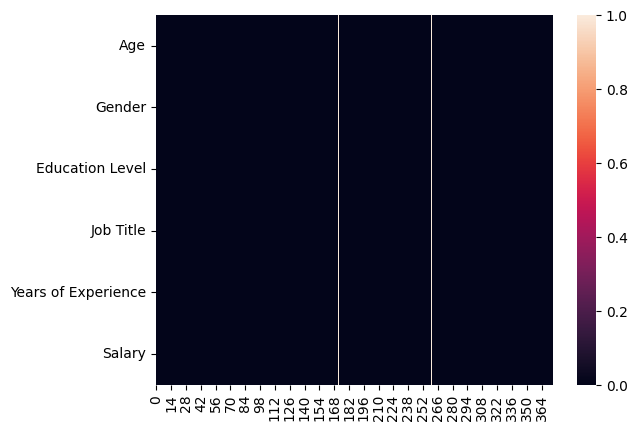

In [7]:
sns.heatmap(df.isna().T)

In [8]:
df.loc[df.isna().any(axis = 'columns')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop the missing rows -- tara esle dataframe update gardaina so we should use inplace = True
df.dropna(inplace=True) # drop the null value

# Features selection

<Axes: >

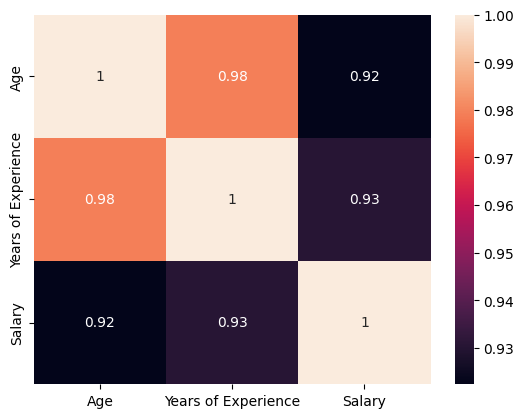

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* The target y  or salary has positive correlation 0.92 with Age .
* The target y or salary has postive correltion 0.93 with Years of Exprience.

Therefore, Age and Years of Exprience is good predictor variable of Salary. However, Age and Years of Exprience themselves are also correlated with correlation value 0.98. Which means two independent variable are correlated. It is a problem of multi-colinarity.

Here, one independent variable predicts other i.e Age can predict Years of exprience and vice verse. Therefore, it makes no sense to include both of them as independent variable to predict salary. Hence, We drop one column.

We want to drop one either Age or Years of Exprience column but which one?

* Reasion 1: Years of exprience is more correlated with Salary than Age.
* Reasion 2: Years of exprience is easily available in inference time i.e you can just ask a candidate their years of exprience but you cannot ask their age with ease.



<Axes: xlabel='Education Level', ylabel='Salary'>

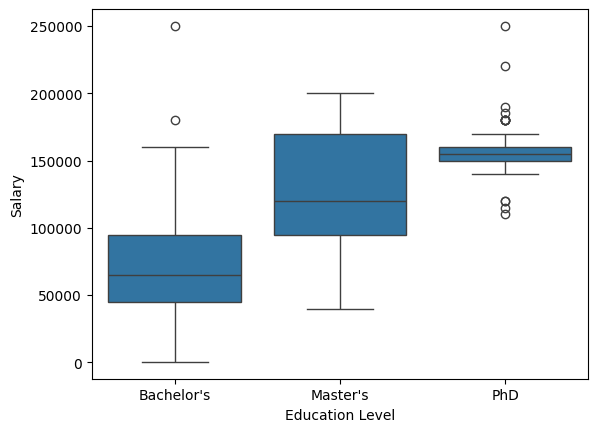

In [11]:
sns.boxplot(x= 'Education Level', y = 'Salary',data = df)

<Axes: xlabel='Education Level', ylabel='Salary'>

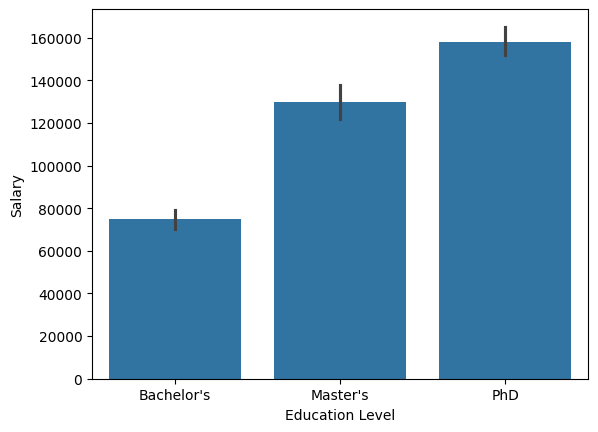

In [32]:
sns.barplot(x= 'Education Level', y = 'Salary',data = df)

In [21]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [22]:
# average median salary of Bachelor's masters and phd is different ; Education level affect salary
X = df.loc[:,['Years of Experience','Education Level']]
y = df.Salary

In [23]:
X.head()

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Education']= encoder.fit_transform(df['Education Level'])

In [28]:
del X['Education Level']

In [29]:
X.head(2)

,Years of Experience,Education
0,5.0,0
1,3.0,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # test_size= 0.2 means 20% test data


In [31]:
from sklearn.svm import LinearSVR

model = LinearSVR(C=1.0,epsilon=0.2)
model.fit(X_train,y_train)

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=0.2)

In [32]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse}")
print(f"MAE : {mae} ")
print(f"R2_Score : {r2}")


MSE: 5485554807.08
MAE : 68352.41333333333 
R2_Score : -1.6660542857608815


* In Linear regression:

  MAE =  234007303.3807584

  MSE =  11104.79425163584
  
  R2_score =  0.9023986325841762